In [54]:
import pandas as pd
from plotnine import *
import statsmodels.formula.api as sm
df = pd.read_csv("movie_metadata.csv")

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [57]:
df['budget'] = df['budget']/1000000
# standardizing to remove outliers
stat_df = df.agg({'budget': ['mean', 'std']})
ln = len(df.index)
df['mean_bgt'] = [stat_df.budget[0]]* ln
df['std_bgt'] = [stat_df.budget[1]]* ln
df['stdzd_bgt'] = (df['budget']-df['mean_bgt'])/df['std_bgt']

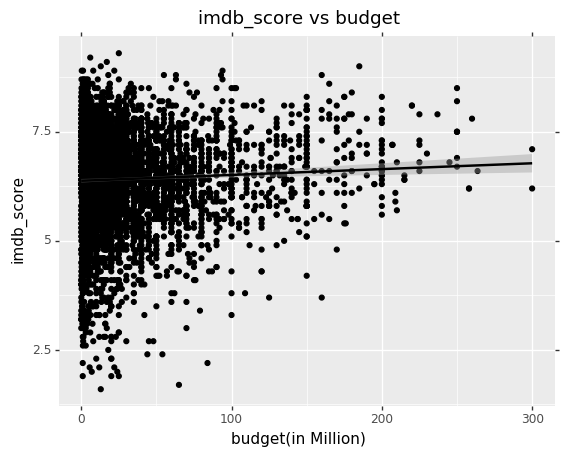

<ggplot: (-9223371922802106396)>

In [58]:
temp_df = df.query('stdzd_bgt <= 1.5')
(ggplot(temp_df, aes(x='budget', y='imdb_score')) + geom_point()+geom_smooth(method='lm')+labs( x = "budget(in Million)",y= "imdb_score", title = 'imdb_score vs budget'))

In [59]:
res = sm.ols('imdb_score~budget', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             imdb_score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.288
Date:                Wed, 13 May 2020   Prob (F-statistic):             0.0384
Time:                        16:33:49   Log-Likelihood:                -6952.8
No. Observations:                4551   AIC:                         1.391e+04
Df Residuals:                    4549   BIC:                         1.392e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4166      0.017    381.130      0.000       6.384       6.450
budget         0.0002   8.02e-05      2.071      0.038    8.84e-06       0.000
==============================================================================
Omnibus:                      430.535   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              608.079
Skew:                          -0.750   Prob(JB):                    9.07e-133
Kurtosis:                       3.978   Cond. No.                         214.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""